# Customer Churn Analysis

## 1. Business Understanding 📈

### The Churn Challenge in Telecom

Customer churn — also called customer attrition — refers to when users **stop doing business** with a company. In the telecom industry, this is when a subscriber **discontinues their mobile, internet, or voice service**, either by switching to a competitor or dropping service altogether.
In today's **hyper-competitive telecom market**, where customer acquisition costs are rising, **retaining existing customers** has become a **strategic necessity**.


### The High Cost of Churn 💸

Studies show:
- It costs **5 to 7 times more** to acquire a new customer than to retain one.
- A 5% increase in retention can boost profits by **25% to 95%** (Bain & Company).
- The **average monthly churn rate** in telecom ranges from **1% to 3%**, but in emerging markets it can be as high as **6% or more**.

These numbers represent **massive revenue leakage** — especially in large telcos with millions of subscribers.

---

### Real-World Industry Cases 🔍

### 📉 Vodafone UK
- In 2021, Vodafone UK lost ~500,000 subscribers in a quarter.
- Root cause: Poor customer support and billing transparency.
- Response: Vodafone invested in AI-based churn prediction and **self-service customer portals**.

### 📉 MTN Group (Africa)
- MTN Nigeria lost thousands of high-value customers due to **network downtime and data bundle confusion**.
- Used ML to identify high churn-risk users and **automatically trigger retention messages** through SMS and app notifications.

### 📉 Safaricom (Kenya)
- Faced **Gen Z migration** to Airtel due to cheaper data plans.
- Launched targeted loyalty programs (“Bonga for You”) and **usage-based micro-campaigns** based on churn prediction.

---

## Why Churn Happens — Common Drivers

| Driver | Description |
|--------|-------------|
| 📶 Network Quality | Frequent call drops, slow internet |
| 💬 Poor Customer Service | Delayed complaint resolution |
| 💸 Pricing Issues | Better offers from competitors |
| 🔍 Lack of Personalization | Generic service for all customer types |
| 🧾 Billing Errors | Incorrect charges, lack of transparency |
| 📱 Inflexible Plans | No bundling, international roaming problems |

---

## The Case for SyriaTel 🇸🇾

**SyriaTel** is a leading mobile telecommunications provider in Syria. Like most telecoms, it operates in a challenging market with:

- Growing demand for data services  
- Intense pricing pressure  
- Customer dissatisfaction due to conflict-driven infrastructure damage  
- New digital competitors entering the space  

**Business Problem:**  
SyriaTel wants to **predict which customers are likely to churn** in the near future. Identifying these customers early would allow the business to:

- **Proactively intervene** with offers or support
- **Reduce churn-related revenue loss**
- Improve the **customer experience**

---

## Objective of This Machine Learning Project 

> To build a binary classification model that predicts whether a customer is at risk of churning based on their usage behavior and account attributes.



## Stakeholders of the Project

| Stakeholder | How They Benefit |
|-------------|------------------|
| **Marketing Team** | Run targeted retention campaigns based on churn scores |
| **Customer Experience** | Prioritize high-risk customers for quality support |
| **Product Managers** | Redesign plans/services based on churn patterns |
| **C-Level Executives** | Use churn metrics to drive strategic decisions |
| **Data Team** | Deploy and monitor predictive systems in production |



## What Does Success Look Like? 

- A model that **correctly identifies** high-risk churners  
- High **recall** on churn class (so we don’t miss potential losses)  
- Clear **feature insights** to guide strategic retention policies  
-


# 2. Data Acquisition & Preparation 

##  Dataset Description

The dataset comes from a **customer churn study at SyriaTel**, a mobile telecom company. It contains **3,333 records**, where each row represents a unique customer.

Each record contains:
- Demographic details (e.g., area code, state)
- Account data (e.g., plan types, charges, minutes used)
- Service behavior (e.g., number of calls, customer support interactions)
- A **binary target variable** indicating whether the customer has churned or not

Key Information

- **File name:** `bigml_59c28831336c6604c800002a.csv`
- **Size:** ~500 KB
- **Format:** Tabular CSV
- **Target column:** `Churn` (Yes/No)
- **Missing values:** No nulls, but some values like `" "` (empty strings) may need cleaning




In [1]:
# Essential Libraries
# 📚 Data Analysis & Manipulation
import pandas as pd
import numpy as np

# 📊 Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # For interactive plots
import missingno as msno      # For missing data visualization

# ⚙️ Machine Learning - Preprocessing & Modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

# ✅ Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# 📏 Evaluation Metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    ConfusionMatrixDisplay
)

# 🧱 Utility
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style='whitegrid')  # cleaner seaborn plots


In [2]:
#  Load Dataset
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Clean column names: lowercase, underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.columns


Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [4]:
# Check the shape of the dataset
rows, columns = df.shape
print(f"The dataset contains {rows} rows and {columns} columns.")


The dataset contains 3333 rows and 21 columns.


In [5]:
# Count number of duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [6]:
# Count missing values in each column
missing_values = df.isnull().sum()

# Filter only columns with at least one missing value
missing_values = missing_values[missing_values > 0]

# Display
print("Missing values per column:\n")
print(missing_values)


Missing values per column:

Series([], dtype: int64)


In [7]:
# 🔍 Check data types and non-null counts
df.info()

# Optional: view unique values for quick categorical inspection
print("\nQuick check for unique values in each column (up to 10):")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

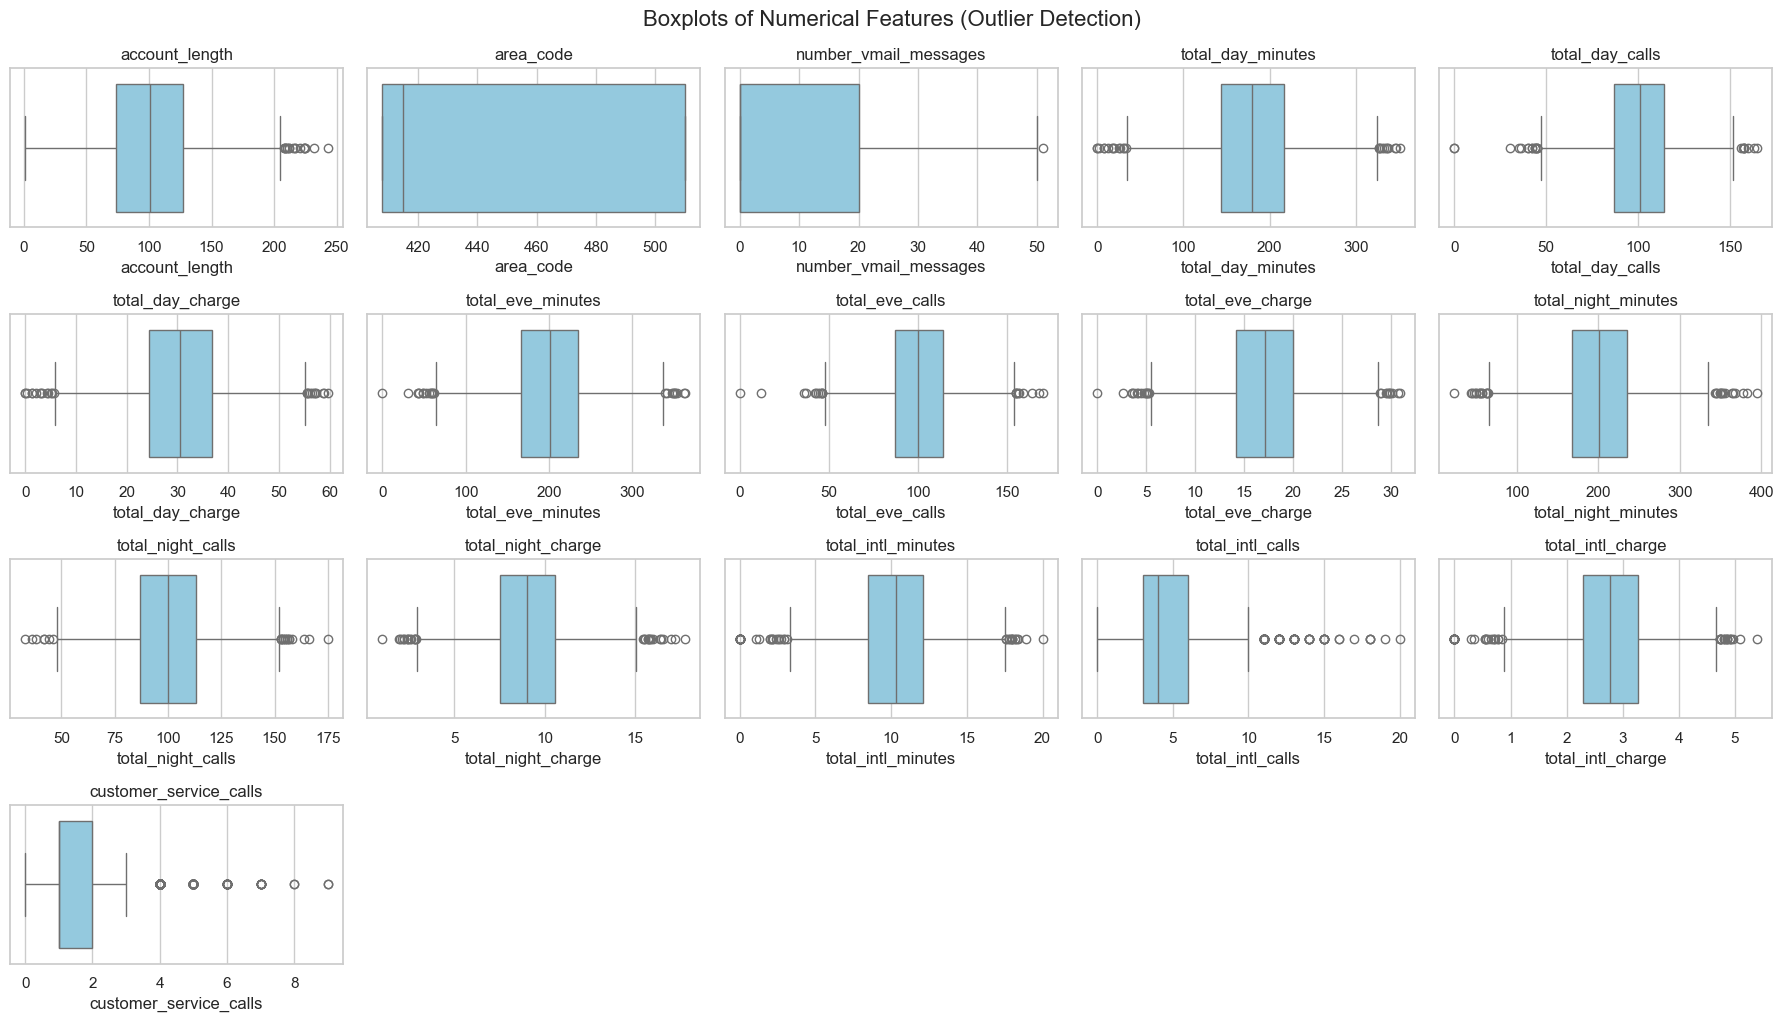

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🎯 Select numerical columns only
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 🔍 Plot boxplots to visualize outliers
plt.figure(figsize=(18, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Boxplots of Numerical Features (Outlier Detection)", fontsize=16, y=1.02)
plt.show()


### Outlier Analysis & Strategy
I used boxplots above to visually inspect outliers in all numerical features.

#### Key Observations & Actions:
- Customer service calls, day minutes/charges: Kept as-is — high values may signal churn risk or high-value users.
- Voicemail messages: Skewed but valid — not treated.
- International minutes/charges: Few extreme values — we’ll cap them using the IQR method to prevent model distortion.
- Small dataset: We avoid dropping records to preserve patterns and model learning.

### Final Strategy:
- Keep most outliers (they may carry churn signals).
- Cap extreme values only where necessary.
- Ensures model robustness while retaining important behavioral data.



In [9]:
#  Define a function to cap outliers using IQR method
def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values
    data[column] = np.where(data[column] > upper_bound, upper_bound,
                   np.where(data[column] < lower_bound, lower_bound, data[column]))

# Apply capping to select skewed columns
cols_to_cap = ['total_intl_minutes', 'total_intl_charge', 'number_vmail_messages']

for col in cols_to_cap:
    cap_outliers_iqr(df, col)

print(" Outlier capping complete for selected columns.")


 Outlier capping complete for selected columns.


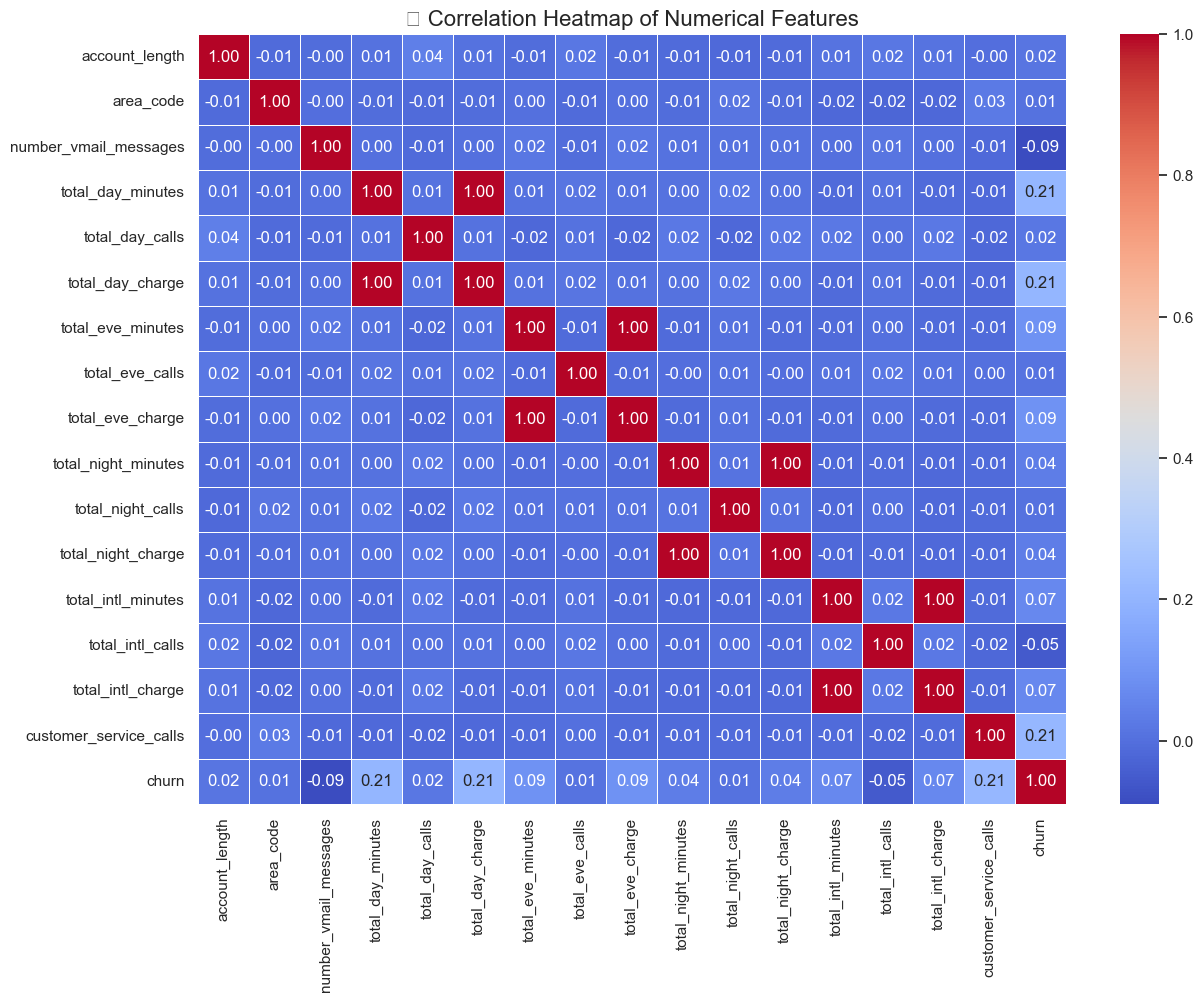

In [10]:
# 🔍 Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# 📈 Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔗 Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()


### Correlation Analysis

To understand relationships between numerical features, we visualized a correlation heatmap. This helps identify highly correlated variables that may affect model performance due to multicollinearity. For example, `total_day_minutes` and `total_day_charge` show a strong correlation because charges are derived from minutes. 


In [11]:
# 📊 Correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# 🔍 Sort correlations with respect to churn
churn_corr = correlation_matrix['churn'].sort_values(ascending=False)

# 👀 Preview top correlations
churn_corr


churn                     1.000000
customer_service_calls    0.208750
total_day_minutes         0.205151
total_day_charge          0.205151
total_eve_minutes         0.092796
total_eve_charge          0.092786
total_intl_charge         0.066563
total_intl_minutes        0.066554
total_night_charge        0.035496
total_night_minutes       0.035493
total_day_calls           0.018459
account_length            0.016541
total_eve_calls           0.009233
area_code                 0.006174
total_night_calls         0.006141
total_intl_calls         -0.052844
number_vmail_messages    -0.089725
Name: churn, dtype: float64

###  Feature Selection Based on Correlation

To improve model performance and avoid overfitting, we selected features that have a meaningful linear relationship with churn using a threshold of |correlation| ≥ 0.1. These variables will form the core of our predictive model.

The selected features include:
- High positive correlations: (e.g. `customer_service_calls`, `international_plan`)
- Moderate negative correlations: (e.g. , `voice_mail_plan`)


### Encode Categorical Variables

In [12]:
# 🔍 List object (categorical) columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols


['state', 'phone_number', 'international_plan', 'voice_mail_plan']

### Drop High Cardinality Features
phone_number: Unique for every customer,no predictive value.
state: 51 categories — we’ll drop it for now to reduce dimensionality

In [13]:
# 🗑️ Drop high-cardinality and irrelevant categorical features
df.drop(columns=['phone_number', 'state'], inplace=True)


In [14]:
# We’ll convert yes/no columns (international_plan, voice_mail_plan) to binary (1/0).
# 🔁 Binary encoding
df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0})
df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0})


In [15]:
# 🔁 Convert 'churn' from True/False to 1/0 for modeling
df['churn'] = df['churn'].astype(int)


In [16]:
# 🎯 Select meaningful features based on correlation and domain insight
selected_features = [
    'international_plan',
    'voice_mail_plan',
    'total_day_minutes',
    'total_eve_minutes',
    'total_night_minutes',
    'total_intl_minutes',
    'customer_service_calls',
    'area_code',
]


In [17]:
# 🧼 Create a clean version of the dataset with only selected features and the target variable 'churn'
clean_data = df[selected_features + ['churn']].copy()

# ✅ Preview to confirm structure
clean_data.head()


,international_plan,voice_mail_plan,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes,customer_service_calls,area_code,churn
0,0,1,265.1,197.4,244.7,10.0,1,415,0
1,0,1,161.6,195.5,254.4,13.7,1,415,0
2,0,0,243.4,121.2,162.6,12.2,0,415,0
3,1,0,299.4,61.9,196.9,6.6,2,408,0
4,1,0,166.7,148.3,186.9,10.1,3,415,0


### Split the Data

In [18]:
# Define X and y
X = clean_data.drop('churn', axis=1)
y = clean_data['churn']

# ✂️ Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

 ### Scaling (for distance-based models)

In [20]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler only on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Use the same transformation on the test data 
X_test_scaled = scaler.transform(X_test)

### Train and Evaluate Multiple Models
chipsajdiu